In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

### problem 1

# since the largest diameter we will test is d = 3, and in that case the disc can at most cross 
# 4 lines simultaneously when perfectly placed with the top and bottom lines tangent to the disc. However,
# this edge case would not be expected to be obtained in a Monte Carlo method, since the probability of a perfect 
# disc placement with arbitrarily high precision is vanishingly small. In any case, it is sufficient to use five
# parallel lines. 

# lets use the positive quadrant with the following five parallel lines: y = 0 (x-axis), y=1, y=2, y=3, y=4
# also, lets restrict the domain to 0, 4 for convenience (our sampling area is just a square and is bigger in each
# dimension than any of the diameters we are concerned with)
# one would think we may have a problem for the vertical edges of the square since we may miss an intersection
# if it occurs outside our region of interest. However, this is only a problem in the vanishingly rare case of a
# circle where the line of intersection coincides with a tangent. This is clear from the quadratic nature of the 
# circle equation: the are always two intersections (roots), one intersection (root), or no intersection with a 
# given line. Thus, we may neglect the finite size effect of the square sampling area. 
# We will also need to address the problem that arises when the diameters of the circles are randomly placed 
# near the horizontal edges of the region: in the case where d > 2 it is possible that the circle may intersect 
# a parallel line if our region was expanded in the vertical direction. We will address the edge case manually 
# only for those diameters for which it is possible. 
time1 = time.time()
n_tot = 4444444 # the prescribed number of discs to use
prob_arr1 = np.zeros(13)
prob_arr2 = np.zeros(13)
prob_arr3 = np.zeros(13)
prob_arr4 = np.zeros(13)
counter = 0
d_arr = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 3.0])
for d in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 3.0]: # loop over diameters
    temp_prob1 = 0.0 # temp var to store when discs intersect line(s)
    temp_prob2 = 0.0
    temp_prob3 = 0.0
    temp_prob4 = 0.0
    for n in range(n_tot):
        x_0 = np.random.uniform(0.0, 4.0) # randomly assign the x coordinate of disc center
        y_0 = np.random.uniform(0.0, 4.0) # randomly assign the y-coordinate the disc center
        # eqn of circle: (x-x_0)**2 + (y-y_0)**2 = (d/2)**2
        if d < 1.0:  
            for y in [0.0, 1.0, 2.0, 3.0, 4.0]: # check if the disc intersects each line using the discriminant
                if ( (d/2.0)**2 - (y - y_0)**2 ) >= 0.0:
                    temp_prob1 += 1.0
        if d >= 1.0 and d < 2.0: 
            crosses = 0
            for y in [0.0, 1.0, 2.0, 3.0, 4.0]: # check if the disc intersects each line using the discriminant
                if ( (d/2.0)**2 - (y - y_0)**2 ) >= 0.0:
                    crosses += 1
            if crosses  == 1: # record if only one line is crossed
                temp_prob1 += 1.0
            if crosses == 2: # record if only two lines are crossed
                temp_prob2 += 1.0
                temp_prob1 += 1.0
                
        if d>=2.0 and d < 3.0:
            crosses = 0
            for y in [0.0, 1.0, 2.0, 3.0, 4.0]: # check if the disc intersects each line using the discriminant
                if ( (d/2.0)**2 - (y - y_0)**2 ) >= 0.0:
                    crosses += 1
            if crosses  == 1: # record if only one line is crossed
                temp_prob1 += 1.0
            if crosses == 2: # record if only two lines are crossed
                temp_prob2 += 1.0
                temp_prob1 += 1.0
            if crosses == 3: # record if only three lines are crossed
                temp_prob3 += 1.0
                temp_prob2 += 1.0
                temp_prob1 += 1.0
        if d == 3.0:
            crosses = 0
            for y in [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]: # check if the disc intersects each line using the discriminant
                # d == 3 is the only case where a circle placed near the horizontal edges may intersect a line not
                # previously listed
                if ( (d/2.0)**2 - (y - y_0)**2 ) >= 0.0:
                    crosses += 1
            if crosses  == 1: # record if only one line is crossed
                temp_prob1 += 1.0
            if crosses == 2: # record if only two lines are crossed
                temp_prob2 += 1.0
                temp_prob1 += 1.0
            if crosses == 3: # record if only three lines are crossed
                temp_prob3 += 1.0
                temp_prob2 += 1.0
                temp_prob1 += 1.0
            if crosses == 4: # record if only four lines are crossed
                temp_prob4 += 1.0
                temp_prob3 += 1.0
                temp_prob2 += 1.0
                temp_prob1 += 1.0
                    
            # for d_max = 3, it is impossible for their to be any more than 4 lines simultaneously crossed by one disc
    prob_arr1[counter] += temp_prob1/n_tot
    prob_arr2[counter] += temp_prob2/n_tot
    prob_arr3[counter] += temp_prob3/n_tot
    prob_arr4[counter] += temp_prob4/n_tot
    counter += 1
    
    
time2 = time.time()
print('Runtime: ' + str(time2 - time1) + ' s')
    
plt.title('P(1 line) versus d')
plt.xlabel('d')
plt.ylabel('P(1 line)')
plt.scatter(d_arr, prob_arr1, label = 'Data')
plt.plot(d_arr, prob_arr1, color='red', label = 'Trendline')
plt.savefig('./p1line.png')
plt.legend()
plt.clf()


plt.title('P(2 line) versus d')
plt.xlabel('d')
plt.ylabel('P(2 line)')
plt.scatter(d_arr, prob_arr2, label = 'Data')
plt.plot(d_arr, prob_arr2, color='red', label = 'Trendline')
plt.savefig('./p2line.png')
plt.legend()
plt.clf()

plt.title('P(3 line) versus d')
plt.xlabel('d')
plt.ylabel('P(3 line)')
plt.scatter(d_arr, prob_arr3, label = 'Data')
plt.plot(d_arr, prob_arr3, color='red', label = 'Trendline')
plt.savefig('./p3line.png')
plt.legend()
plt.clf()

plt.title('P(4 line) versus d')
plt.xlabel('d')
plt.ylabel('P(4 line)')
plt.scatter(d_arr, prob_arr4, label = 'Data')
plt.plot(d_arr, prob_arr4, color='red', label = 'Trendline')
plt.savefig('./p4line.png')
plt.legend()
plt.clf()


print(prob_arr1, prob_arr2, prob_arr3, prob_arr4)


Runtime: 291.86564564704895 s
[0.10006719 0.20007205 0.2998753  0.40008312 0.50026753 0.59973126
 0.69996967 0.79999995 0.89979376 1.         1.         1.
 1.        ] [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.50019418 1.
 1.        ] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.optimize import fsolve


### problem 2


time1 = time.time()

# first, let us consider the sampling region: the "rose" is fully contained in the box
# x \in [-1,1] and y \in [-1,1], and since we anticipate a solution in the center we need only sample
# the center of the rectangle within the aformentioned box

# a word about symmetry: the rectangular cutter has 2-fold symmetry, and the rose has 4-fold symmetry
# Given the two-fold symmetry of the cutter, which is the shape 
# subject to rotations, we need only consider rotation angles in [0, pi/2]. (any missing orientations that happen
# to be area maximizers will be able to be obtained from calculated maximizers by rotations thanks to symmetry)
# given the four-fold symmetry of the rose, which is to remain fixed in the optimization procedure, we need
# only consider the location of the center of the cutter within any one quadrant.
# We anticipate that our solution must respect the symmetries of this problem (the optimally placed cutter cannot
# depend on our choice of axes).


# we want to maximize the area cut out, this is the same as minimizing -area

n_tot = 10000 # set the total number of iterations
sqrt2 = np.sqrt(2.0)
def E(x, y, a): # define a function for computing the area cut by the rectangle
    
    
    ns = np.array([np.sin(a), np.cos(a)]) # direction vector for short side
    nl = np.array([np.cos(a), -np.sin(a)]) # direction vector for long side
    # now, we need to determine the area inside both the rose and the cutter
    # approach: divide the cutter into a grid of many small rectangles, and determine if the center of each square is
    # inside the rose
    center = np.array([x,y])
    vertex1 = -0.5*nl + (0.5/sqrt2)*ns + center
    
    num_points = 200
    nl_range = np.linspace(0.0, 1.0, num_points + 1)
    ns_range = np.linspace(0.0, 1.0/sqrt2,num_points + 1)
    step_size_long = abs(nl_range[1] - nl_range[0])
    step_size_short = abs(ns_range[1] - ns_range[0])
    area = 0.0
    for i in range(num_points):
        for j in range(num_points):
            point =  vertex1 + (-0.5*step_size_short*ns + 0.5*step_size_long*nl) - i*step_size_short*ns + j*step_size_long*nl 
            if np.sqrt(point[0]**2 + point[1]**2) < np.sin(2.0*np.arctan(abs(point[1]/point[0]))): # check if point is in rose
                area += step_size_long*step_size_short # add area if the center is in the rose
    return -area
    
   # run metropolis

x0 = np.random.uniform(0.0, 1.0) # generate initial center of rectangle 
y0 = np.random.uniform(0.0, 1.0)
a0 = np.random.uniform(0.0, np.pi/2) # generate initial angle of rotation of cutter
T = 0.004218952609952337
for n in range(n_tot):
    x1 = x0 + np.random.uniform(-0.01, 0.01)
    y1 = y0 + np.random.uniform(-0.01, 0.01)
    a1 = a0 + np.random.uniform(-0.01, 0.01)
    prob = min(np.exp(-(E(x1,y1,a1) - E(x0,y0,a0))/T) , 1.0)
    random_number = np.random.uniform(0.0, 1.0)
    if random_number < prob:
        x0 = x1
        y0 = y1
        a0 = a1
    
    
time2 = time.time()    
   
print('The optimal set of parameters is: ', x0, y0, a0)
print('The maximum area is: ', -E(x0,y0,a0))
print('Runtime: ' + str(time2-time1) + ' s')
    


The optimal set of parameters is:  -0.08856892702234963 0.05339883457476227 -0.15684343700632059
The maximum area is:  0.5698043219494323
Runtime: 7961.528223991394 s


In [75]:

print(-E(0.01,0,0))
print(-E(0,0,0))

'''The optimal set of parameters is:  -0.08856892702234963 0.05339883457476227 -0.15684343700632059
The maximum area is:  0.5698043219494323
Runtime: 7961.528223991394 s'''



0.5884542633034617
0.5885956846596991


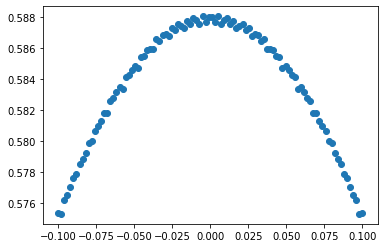

In [82]:
x0_array = np.linspace(-0.1, .1, 100)

origin_vary_x0 = np.zeros(100)

for i in range(100):
    origin_vary_x0[i] += -E(x0_array[i],0,0)

plt.scatter(x0_array, origin_vary_x0)

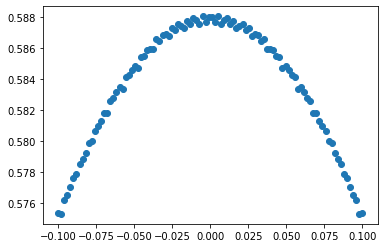

In [83]:
y0_array = np.linspace(-0.1, .1, 100)

origin_vary_y0 = np.zeros(100)

for i in range(100):
    origin_vary_y0[i] += -E(y0_array[i],0,0)

plt.scatter(y0_array, origin_vary_y0)

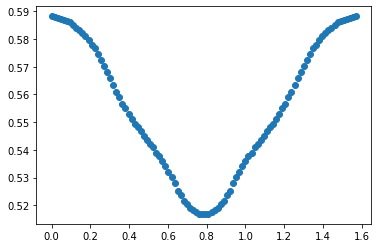

In [85]:
a_array = np.linspace(0.0, np.pi/2, 100)

origin_vary_a = np.zeros(100)

for i in range(100):
    origin_vary_a[i] += -E(0,0,a_array[i])

plt.scatter(a_array, origin_vary_a)

In [38]:
 '''integration_points_x = np.random.uniform(x_min, x_max, size=points)
    integration_points_y = np.random.uniform(y_min, y_max, size=points )
    points_in = 0.0
    for i in range(integration_points_x.size):
        # now determine if point i is in the rectangle
        dist_along_ns = abs(np.dot(np.array([integration_points_x[i], integration_points_y[i]]) - np.array([x,y]), ns))
        dist_along_nl = abs(np.dot(np.array([integration_points_x[i], integration_points_y[i]]) - np.array([x,y]), nl))
        if (dist_along_ns < 0.5*(1.0/np.sqrt(2.0))) and (dist_along_nl < 0.5):
            condition1 = True
        else:
            condition1 = False
        # now determine if point i is in the rose, and we can do this by treating the point as if it were in 
        # quadrant 1
        r = np.sqrt(integration_points_x[i]**2 + integration_points_y[i]**2)
        theta = np.arctan(abs(integration_points_y[i]/integration_points_x[i]))
        if r < np.sin(2.0*theta):
            condition2 = True
        else:
            condition2 = False
            
        if condition1 and condition2:
            points_in += 1.0
            
    return (-(points_in/points)*(x_max - x_min)*(y_max-y_min))'''

0.5911412690719536

In [86]:
# determine T
x0 = np.random.uniform(0.0, 1.0)
y0 = np.random.uniform(0.0, 0.1)
a0 = np.random.uniform(0.0, np.pi/2)
average = 0.0
for i in range(100):
    
    x1 = x0 + np.random.uniform(-0.01, 0.01)
    y1 = y0 + np.random.uniform(-0.01, 0.01)
    a1 = a0 + np.random.uniform(-0.01, 0.01)
    
    average += abs(E(x1,y1,a1)- E(x0,y0,a0))
    
average = average/100
print(average)

0.004218952609952337


In [89]:
## run more iterations

time1 = time.time()

# first, let us consider the sampling region: the "rose" is fully contained in the box
# x \in [-1,1] and y \in [-1,1], and since we anticipate a solution in the center we need only sample
# the center of the rectangle within the aformentioned box

# a word about symmetry: the rectangular cutter has 2-fold symmetry, and the rose has 4-fold symmetry
# Given the two-fold symmetry of the cutter, which is the shape 
# subject to rotations, we need only consider rotation angles in [0, pi/2]. (any missing orientations that happen
# to be area maximizers will be able to be obtained from calculated maximizers by rotations thanks to symmetry)
# given the four-fold symmetry of the rose, which is to remain fixed in the optimization procedure, we need
# only consider the location of the center of the cutter within any one quadrant.
# We anticipate that our solution must respect the symmetries of this problem (the optimally placed cutter cannot
# depend on our choice of axes).


# we want to maximize the area cut out, this is the same as minimizing -area

n_tot = 1000 # set the total number of iterations
sqrt2 = np.sqrt(2.0)
def E(x, y, a): # define a function for computing the area cut by the rectangle
    
    
    ns = np.array([np.sin(a), np.cos(a)]) # direction vector for short side
    nl = np.array([np.cos(a), -np.sin(a)]) # direction vector for long side
    # now, we need to determine the area inside both the rose and the cutter
    # approach: divide the cutter into a grid of many small rectangles, and determine if the center of each square is
    # inside the rose
    center = np.array([x,y])
    vertex1 = -0.5*nl + (0.5/sqrt2)*ns + center
    
    num_points = 200
    nl_range = np.linspace(0.0, 1.0, num_points + 1)
    ns_range = np.linspace(0.0, 1.0/sqrt2,num_points + 1)
    step_size_long = abs(nl_range[1] - nl_range[0])
    step_size_short = abs(ns_range[1] - ns_range[0])
    area = 0.0
    for i in range(num_points):
        for j in range(num_points):
            point =  vertex1 + (-0.5*step_size_short*ns + 0.5*step_size_long*nl) - i*step_size_short*ns + j*step_size_long*nl 
            if np.sqrt(point[0]**2 + point[1]**2) < np.sin(2.0*np.arctan(abs(point[1]/point[0]))):
                area += step_size_long*step_size_short
    return -area
    
   # run metropolis

x0 = -0.08856892702234963 
y0 = 0.05339883457476227 
a0 = -0.15684343700632059
T = 0.004218952609952337
for n in range(n_tot):
    x1 = x0 + np.random.uniform(-0.01, 0.01)
    y1 = y0 + np.random.uniform(-0.01, 0.01)
    a1 = a0 + np.random.uniform(-0.01, 0.01)
    prob = min(np.exp(-(E(x1,y1,a1) - E(x0,y0,a0))/T) , 1.0)
    random_number = np.random.uniform(0.0, 1.0)
    if random_number < prob:
        x0 = x1
        y0 = y1
        a0 = a1

    
time2 = time.time()    
   
print('The optimal set of parameters is: ', x0, y0, a0)
print('The maximum area is: ', -E(x0,y0,a0))
print('Runtime: ' + str(time2-time1) + ' s')
    

The optimal set of parameters is:  0.05968959907761678 0.03851357148797961 -0.04548689451613434
The maximum area is:  0.581259451804644
Runtime: 799.205986738205 s


In [90]:
-E(0,0,0)

0.5882421312688548

In [93]:
def E(x, y, a): # define a function for computing the area cut by the rectangle
    
    
    ns = np.array([np.sin(a), np.cos(a)]) # direction vector for short side
    nl = np.array([np.cos(a), -np.sin(a)]) # direction vector for long side
    # now, we need to determine the area inside both the rose and the cutter
    # approach: divide the cutter into a grid of many small rectangles, and determine if the center of each square is
    # inside the rose
    center = np.array([x,y])
    vertex1 = -0.5*nl + (0.5/sqrt2)*ns + center
    
    num_points = 2000
    nl_range = np.linspace(0.0, 1.0, num_points + 1)
    ns_range = np.linspace(0.0, 1.0/sqrt2,num_points + 1)
    step_size_long = abs(nl_range[1] - nl_range[0])
    step_size_short = abs(ns_range[1] - ns_range[0])
    area = 0.0
    for i in range(num_points):
        for j in range(num_points):
            point =  vertex1 + (-0.5*step_size_short*ns + 0.5*step_size_long*nl) - i*step_size_short*ns + j*step_size_long*nl 
            if np.sqrt(point[0]**2 + point[1]**2) < np.sin(2.0*np.arctan(abs(point[1]/point[0]))):
                area += step_size_long*step_size_short
    return -area

print(-E(0,0,0))

0.5878680717627877


In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import time



### Problem 3
time1 = time.time()
v0 = 88.0
w = 44.0
a = 100.0
k = w/v0
h = -0.01 # we are going from x = a > 0 to (x,y) = (0,0), so we must make steps in the -x direction
x0 = a
y0 = 0.0
def f(x,y):
    return ( y/x - k*np.sqrt(1.0 + (y/x)**2))


### implement forward Euler

x_list = [x0]
y_list = [y0]
while (x0 > 0.0): ## note: we cannot actually evaluate f(x0,y0) at x0=0.0 because of the term y/x in f
    y0 = y0 + h*f(x0,y0)
    x0 += h
    if abs(y0) < 30.0:  # ensure we are not getting a diverging result when x0 is small (we divide by x0 in f(x,y))
        
        x_list.append(x0) # store the x-coordinate for constructing the trajectory
        y_list.append(y0) # store the y-coordinate for constructing the trajectory
    
plt.title('Plane Trajectory')
plt.xlabel('x (distance)')
plt.ylabel('y (distance)')
#plt.scatter(np.asarray(x_list), np.asarray(y_list), color = 'blue')
plt.plot(np.asarray(x_list), np.asarray(y_list), color='blue')
plt.savefig('./trajectory_forward_euler.png')
plt.clf()
time2 = time.time()
print('Runtime for the forward Euler method at h = ' + str(abs(h)) + ' : ', time2-time1, ' s')


### implement backward Euler
x0 = a
y0 = 0.0

x_list = [x0]
y_list = [y0]
time1 = time.time()
while (x0+h > 0.0): ## note: we cannot actually evaluate f(x0,y0) at x0=0.0 because of the term y/x in f
    x0 += h
    def backeuler(y):
        return (y0 + h*f(x0, y) - y)
    y0 = fsolve(backeuler, y0)[0] # solve the implicit equation for y1, the next predicted y-value
    if abs(y0) < 30.0:  # ensure we are not getting a diverging result when x0 is small (we divide by x0 in f(x,y))
        
        x_list.append(x0) # store the x-coordinate for constructing the trajectory
        y_list.append(y0) # store the y-coordinate for constructing the trajectory
    
plt.title('Plane Trajectory')
plt.xlabel('x (distance)')
plt.ylabel('y (distance)')
#plt.scatter(np.asarray(x_list), np.asarray(y_list), color = 'blue')
plt.plot(np.asarray(x_list), np.asarray(y_list), color='blue')
plt.savefig('./trajectory_backward_euler.png')
plt.clf()
time2 = time.time()
print('Runtime for the backward Euler method at h = ' + str(abs(h)) + ' : ', time2-time1, ' s')


### implement explicit midpoint method
time1 = time.time()
x0 = a
y0 = 0.0
x_list = [x0]
y_list = [y0]

while (x0 + h*0.5 > 0.0): ## note: we cannot actually evaluate f(x0,y0) at x0=0.0 because of the term y/x in f
    y0 = y0 + h*f(x0 + h*0.5,y0 + (h*0.5)*f(x0,y0))
    x0 += h
    if abs(y0) < 30.0:  # ensure we are not getting a diverging result when x0 is small (we divide by x0 in f(x,y))
        
        x_list.append(x0) # store the x-coordinate for constructing the trajectory
        y_list.append(y0) # store the y-coordinate for constructing the trajectory
    
plt.title('Plane Trajectory')
plt.xlabel('x (distance)')
plt.ylabel('y (distance)')
#plt.scatter(np.asarray(x_list), np.asarray(y_list), color = 'blue')
plt.plot(np.asarray(x_list), np.asarray(y_list), color='blue')
plt.savefig('./trajectory_exmid.png')
plt.clf()
time2 = time.time()
print('Runtime for the explicit midpoint method at h = ' + str(abs(h)) + ' : ', time2-time1, ' s')


### implement implicit midpoint method  

time1 = time.time()
x0 = a
y0 = 0.0
x_list = [x0]
y_list = [y0]

while (x0 + h*0.5 > 0.0): ## note: we cannot actually evaluate f(x0,y0) at x0=0.0 because of the term y/x in f
    
    def impmid(y):
        return (y0 + h*f(x0 +h*0.5, 0.5*(y0 + y) ) - y)
    y0 = fsolve(impmid, y0)[0]
    x0 += h
    if abs(y0) < 30.0:  # ensure we are not getting a diverging result when x0 is small (we divide by x0 in f(x,y))
       
        x_list.append(x0) # store the x-coordinate for constructing the trajectory
        y_list.append(y0) # store the y-coordinate for constructing the trajectory
    
plt.title('Plane Trajectory')
plt.xlabel('x (distance)')
plt.ylabel('y (distance)')
#plt.scatter(np.asarray(x_list), np.asarray(y_list), color = 'blue')
plt.plot(np.asarray(x_list), np.asarray(y_list), color='blue')
plt.savefig('./trajectory_impmid.png')
plt.clf()
time2 = time.time()
print('Runtime for the implicit midpoint method at h = ' + str(abs(h)) + ' : ', time2-time1, ' s')

### implement Heun's method (first version in the notes)

time1 = time.time()
x0 = a
y0 = 0.0
x_list = [x0]
y_list = [y0]

while (x0 + h > 0.0):
    y0 = y0 + h*0.5*(  f(x0, y0) + f(x0+h, y0 + h*f(x0,y0)))
    x0 += h
    if abs(y0) < 30.0:  # ensure we are not getting a diverging result when x0 is small (we divide by x0 in f(x,y))
        
        x_list.append(x0)
        y_list.append(y0)
    
plt.title('Plane Trajectory')
plt.xlabel('x (distance)')
plt.ylabel('y (distance)')
#plt.scatter(np.asarray(x_list), np.asarray(y_list), color = 'blue')
plt.plot(np.asarray(x_list), np.asarray(y_list), color='blue')
plt.savefig('./trajectory_heuns.png')
plt.clf()
time2 = time.time()
print('Runtime for Heuns method at h = ' + str(abs(h)) + ' : ', time2-time1, ' s')
    
### implement Runge-Kutta RK3 method 

time1 = time.time()
x0 = a
y0 = 0.0
x_list = [x0]
y_list = [y0]

while (x0 + h > 0.0):
    k1 = f(x0, y0)
    k2 = f(x0+0.5*h, y0 + 0.5*h*k1)
    k3 = f(x0 + h, y0 - h*k1 + 2.0*h*k2)
    y0 = y0 + h*(k1/6.0 + 4.0*k2/6.0 + k3/6.0)
    x0 += h
    if abs(y0) < 30.0:  # ensure we are not getting a diverging result when x0 is small (we divide by x0 in f(x,y))
        
        x_list.append(x0)
        y_list.append(y0)
    
plt.title('Plane Trajectory')
plt.xlabel('x (distance)')
plt.ylabel('y (distance)')
#plt.scatter(np.asarray(x_list), np.asarray(y_list), color = 'blue')
plt.plot(np.asarray(x_list), np.asarray(y_list), color='blue')
plt.savefig('./trajectory_RK3.png')
plt.clf()
time2 = time.time()
print('Runtime for the RK3 method at h = ' + str(abs(h)) + ' : ', time2-time1, ' s')


### implement Runge-Kutta RK4 method 

time1 = time.time()
x0 = a
y0 = 0.0
x_list = [x0]
y_list = [y0]

while (x0 + h > 0.0):
    k1 = f(x0, y0)
    k2 = f(x0+0.5*h, y0 + 0.5*h*k1)
    k3 = f(x0 + 0.5*h, y0 + 0.5*h*k2)
    k4 = f(x0 + h, y0 + h*k3)
    y0 = y0 + (h/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    x0 += h
    if abs(y0) < 30.0:  # ensure we are not getting a diverging result when x0 is small (we divide by x0 in f(x,y))
        
        x_list.append(x0)
        y_list.append(y0)
    
plt.title('Plane Trajectory')
plt.xlabel('x (distance)')
plt.ylabel('y (distance)')
#plt.scatter(np.asarray(x_list), np.asarray(y_list), color = 'blue')
plt.plot(np.asarray(x_list), np.asarray(y_list), color='blue')
plt.savefig('./trajectory_RK4.png')
plt.clf()
time2 = time.time()
print('Runtime for the RK4 method at h = ' + str(abs(h)) + ' : ', time2-time1, ' s')



Runtime for the forward Euler method at h = 0.01 :  0.10280394554138184  s
Runtime for the backward Euler method at h = 0.01 :  0.7551209926605225  s
Runtime for the explicit midpoint method at h = 0.01 :  0.09515595436096191  s
Runtime for the implicit midpoint method at h = 0.01 :  0.8849921226501465  s
Runtime for Heuns method at h = 0.01 :  0.10628294944763184  s
Runtime for the RK3 method at h = 0.01 :  0.11382412910461426  s
Runtime for the RK4 method at h = 0.01 :  0.12467098236083984  s


<Figure size 432x288 with 0 Axes>